In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

# plt.style.use('default')
plt.style.use('dark_background')
%matplotlib inline

In [2]:
df_beer = pd.read_csv('./Scraped_Data/df_beer.csv', encoding='latin1')
df_reviews1 = pd.read_csv('./Scraped_Data/1_aws_user_reviews.csv', names=['number', 'url', 'score', 'breakdown', 'username', 'r_text'])
df_reviews2 = pd.read_csv('./Scraped_Data/2_aws_user_reviews.csv', names=['number', 'url', 'score', 'breakdown', 'username', 'r_text'])

## EDA

In [3]:
# double check that there are no duplicate names
df_beer['name'].value_counts(ascending=True)

Union Jack IPA                          1
120 Minute IPA                          1
Sierra Nevada Porter                    1
Miles Davis' Bitches Brew               1
Abrasive Ale                            1
Double Trouble                          1
CBS (Canadian Breakfast Stout)          1
Alpha King                              1
Rübæus                                  1
Blind Pig IPA                           1
Bigfoot Barleywine-Style Ale            1
Curieux (Bourbon Barrel-Aged Tripel)    1
Duvel Belgian Golden Ale                1
Shock Top Belgian White                 1
Edmund Fitzgerald Porter                1
75 Minute IPA                           1
La Fin Du Monde                         1
Bourbon County Brand Stout              1
Orval Trappist Ale                      1
Racer 5 India Pale Ale                  1
Palate Wrecker                          1
Bourbon County Brand Barleywine Ale     1
AleSmith IPA                            1
§ucaba                            

In [4]:
# looking at style of beers
df_beer['style'].value_counts()

American IPA                        45
American Double / Imperial IPA      26
American Double / Imperial Stout    22
Russian Imperial Stout              13
American Pale Ale (APA)              8
American Porter                      7
Belgian Strong Dark Ale              7
Fruit / Vegetable Beer               6
Tripel                               6
American Strong Ale                  5
American Stout                       5
American Pale Wheat Ale              5
Saison / Farmhouse Ale               4
Belgian Strong Pale Ale              4
Milk / Sweet Stout                   4
Quadrupel (Quad)                     4
Witbier                              4
Hefeweizen                           4
American Adjunct Lager               4
Light Lager                          3
Belgian IPA                          3
American Wild Ale                    3
American Brown Ale                   3
Scotch Ale / Wee Heavy               3
American Amber / Red Ale             3
Irish Dry Stout          

In [5]:
print("IPA ", df_beer['style'].str.contains('IPA').value_counts()[1])
print("Porter ", df_beer['style'].str.contains('Porter').value_counts()[1])
print("Stout ", df_beer['style'].str.contains('Stout').value_counts()[1])
print("Lager ", df_beer['style'].str.contains('Lager').value_counts()[1])
print("Ale ", df_beer['style'].str.contains('Ale').value_counts()[1])

IPA  76
Porter  7
Stout  48
Lager  13
Ale  59


In [3]:
df_reviews1 = df_reviews1.drop('number', axis=1)
df_reviews2 = df_reviews2.drop('number', axis=1)

In [4]:
# stack the reviews into 1 df
df_reviews = df_reviews1.append(df_reviews2)

In [5]:
# everything that the scraper correctly scraped
df_useable = df_reviews[df_reviews['breakdown'].str.contains('look:') == True].copy()

In [9]:
# number of useable rows
df_reviews.shape[0] - df_useable.shape[0]

28951

In [6]:
df_has_review = df_useable[df_useable['r_text'].str.contains('No Review') == False].copy()

In [11]:
df_no_review = df_useable[df_useable['r_text'].str.contains('No Review') == True].copy()

In [12]:
# Do people who leave reviews tend to score better?
print('Has review average score', df_has_review['score'].mean(), '\nNo review average score', df_no_review['score'].mean())

Has review average score 4.240229877216896 
No review average score 4.239426436321901


In [13]:
# possible number of reviews per beer
df_has_review.shape[0]/len(df_reviews['url'].unique())

318.69565217391306

In [14]:
df_has_review['r_text'].head()

5     Coffee forward beer that is good but not great...
7     poured from the tap of my kegerator into a por...
10    Look Founders sure craft some of the best "loo...
11    An exceptional stout the flavor is balanced an...
18    Its yummy and dark.  I like my beers yummy and...
Name: r_text, dtype: object

### Ngrams

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

# plt.style.use('default')
plt.style.use('dark_background')
%matplotlib inline

df_reviews1 = pd.read_csv('./Scraped_Data/1_aws_user_reviews.csv', names=['number', 'url', 'score', 'breakdown', 'username', 'r_text'])
df_reviews2 = pd.read_csv('./Scraped_Data/2_aws_user_reviews.csv', names=['number', 'url', 'score', 'breakdown', 'username', 'r_text'])
df_reviews1 = df_reviews1.drop('number', axis=1)
df_reviews2 = df_reviews2.drop('number', axis=1)
df_reviews = df_reviews1.append(df_reviews2)
df_useable = df_reviews[df_reviews['breakdown'].str.contains('look:') == True].copy()
df_has_review = df_useable[df_useable['r_text'].str.contains('No Review') == False].copy()

In [5]:
df_useable.shape

(87199, 5)

In [2]:
stop = stopwords.words('english')

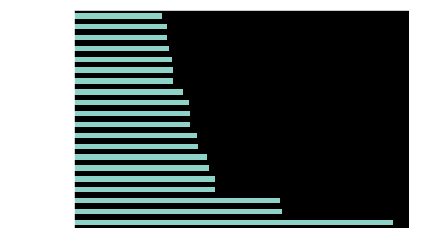

In [6]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stop)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

ngram_text.sum().sort_values(ascending=False).head(20).plot(kind="barh")

In [4]:
# bigram
vect = CountVectorizer(ngram_range=(2,2), stop_words=stop)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

ngram_text.sum().sort_values(ascending=False).head(20).plot(kind="barh")

MemoryError: 

In [ ]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stop)
X = vect.fit_transform(df_has_review['r_text'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

ngram_text.sum().sort_values(ascending=False).head(20).plot(kind="barh")